In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from graspy.inference import SemiparametricTest
from graspy.embed import AdjacencySpectralEmbed
import seaborn as sns
import warnings
from graspy.simulations import binary_sbm#, rdpg
from graspy.utils import symmetrize
from tqdm import tqdm_notebook as tqdm

warnings.filterwarnings("ignore")
FONTSIZE = 30

In [2]:
def double_plot(A, B):
    fig, ax = plt.subplots(1, 2, figsize=(20,10))
    sns.heatmap(A, ax=ax[0], xticklabels=False, yticklabels=False, cbar=False, cmap='Blues')
    sns.heatmap(B, ax=ax[1], xticklabels=False, yticklabels=False, cbar=False, cmap='Blues')
    ax[0].set_title('Adjacency matrix A', fontsize=FONTSIZE)
    ax[1].set_title('Adjacency matrix B',fontsize=FONTSIZE)
    return ax

In [3]:
n = 100
k = 4
L = np.array([
    [0.9, 0.11, 0.13, 0.2],
    [0, 0.7, 0.1, 0.1], 
    [0, 0, 0.8, 0.1],
    [0, 0, 0, 0.85]
])
L = symmetrize(L)

In [4]:
def sbm(rho,k,L,n=100):
    L = symmetrize(L)
    A = binary_sbm([int(n/k)]*k, L)
    B = binary_sbm([int(n/k)]*k, L)
    A = symmetrize(A)
    B = symmetrize(B)
    #np.fill_diagonal(B,0)
    return A,B

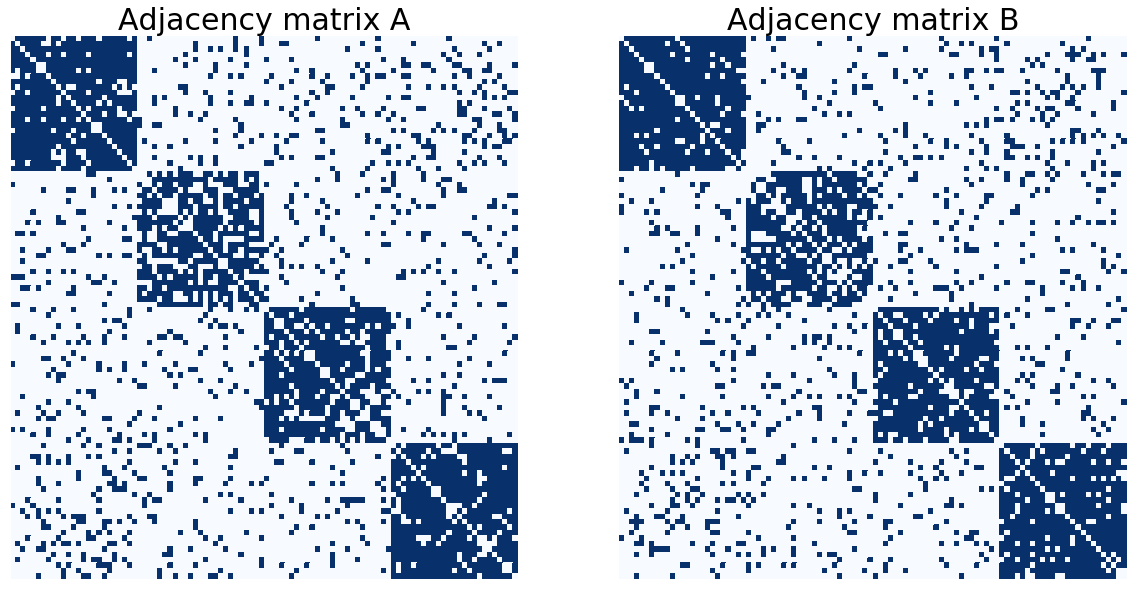

In [5]:
A,B = sbm(.9,k,L,n)
double_plot(A,B)
plt.show()

In [38]:
Xhat1 = AdjacencySpectralEmbed(k=4).fit(A).X
Xhat2 = AdjacencySpectralEmbed(k=4).fit(B).X

In [39]:
print(Xhat1.shape, Xhat2.shape)

(100, 4) (100, 4)


In [26]:
x = np.array([[1,2,3],[4,5,6]])
print(x)
x2 = np.random.shuffle(np.transpose(x))
print(x[x2][0])

[[1 2 3]
 [4 5 6]]
[[2 3 1]
 [5 6 4]]


In [23]:
from scipy.spatial.distance import pdist
Y = pdist(x.T, 'euclidean')

In [24]:
Y

array([2.82842712, 1.41421356, 1.41421356])

In [27]:
Y = pdist(x[x2][0].T, 'euclidean')

In [28]:
Y

array([1.41421356, 1.41421356, 2.82842712])

In [30]:
x = np.array([[1,2,4,8],[1,2,4,8]])
Y = pdist(x.T, 'euclidean')
Y

array([1.41421356, 4.24264069, 9.89949494, 2.82842712, 8.48528137,
       5.65685425])

In [31]:
np.exp(x)

array([[2.71828183e+00, 7.38905610e+00, 5.45981500e+01, 2.98095799e+03],
       [2.71828183e+00, 7.38905610e+00, 5.45981500e+01, 2.98095799e+03]])

In [36]:
ind = np.triu_indices(4,k=1)
values = np.arange(16).reshape(4,4)[ind]
values = [1,2,3,6,7,11]
result = np.zeros((4,4),int)
result[ind]=values
print(values)
print(result)

[1, 2, 3, 6, 7, 11]
[[ 0  1  2  3]
 [ 0  0  6  7]
 [ 0  0  0 11]
 [ 0  0  0  0]]
